# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [38]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Load data

In [5]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [35]:
pd.DataFrame(X_train).describe()

(106, 13)

# PCA + SVM

Task 1: Use X_train, y_train to train a SVM (SKlean's SVC) with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Make sure you normailize the data by using StandardScaler
Evaulate the algorithm using accuracy score and X_test, y_test.

Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of SVM + PCA.

Q2: Did the results improve\stayed the same\got worse? 

In [34]:
####### Task 1 ########
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
model = SVC()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(" Task 1# - Accuracy of SVC without PCA:", accuracy)
##########################




########## TASK 2 ############

# Perform PCA with maximal number of components
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the SVM model
model = SVC()
model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_pca)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(" Task #2 - Accuracy of SVC using PCA:  ", accuracy)
print(" Task #2 Question #1 - The coworker is wrong, the accuracy should be at most as high as the score without PCA since we lose information in each\n dimension reducded by PCA.")
print(" Task #2 Question #2 - we did not reduce any dimension and hence didn't reduce the accuracy score.")
##################################



 Task 1# - Accuracy of SVC without PCA: 0.9861111111111112
 Task #2 - Accuracy of SVC using PCA:   0.9861111111111112
 Task #2 Question #1 - The coworker is wrong, the accuracy should be at most as high as the score without PCA since we lose information in each
 dimension reducded by PCA.
 Task #2 Question #2 - we did not reduce any dimensions and hence didn't reduce the accuracy score.


# PCA + logistice regression

Task 3: repeat task 1 with logistic regression.

Task 4: repeast task 2 with logistic regression.

Q3: Did the results improved\stayed the same\got worse?

Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of SVM from it. Hint: SVM assumes the data can be seperated by an hyperplan.

In [51]:
from sklearn.naive_bayes import GaussianNB


# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the GaussianNB model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy no PCA:", accuracy)

Accuracy: 0.9722222222222222


# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

Task 6: Use t-SNE to visualize the data. Plot the results.

Task 7: Use UMAP to visualize the data. Plot the results.

Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?

c:\Users\yosefos\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\yosefos\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


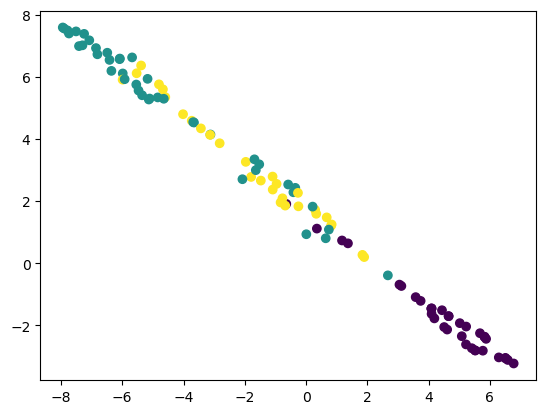

In [49]:
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X_train)

# Plot the data in the reduced space
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y_train)


In [50]:
from umap import UMAP
import matplotlib.pyplot as plt

# Use UMAP to reduce the dimensions of the data to 2
umap = UMAP(n_components=2)
X_reduced = umap.fit_transform(X_train)

# Plot the data in the reduced space
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train)
plt.colorbar()
plt.show()

ModuleNotFoundError: No module named 'umap'